Source code: https://github.com/ndang01/ndang01.github.io/blob/main/posts/blog2/LogisticRegression.py

# The Data

Below is a nonseparable data in which we will apply the gradient descent and stochastic gradient descent methods on.

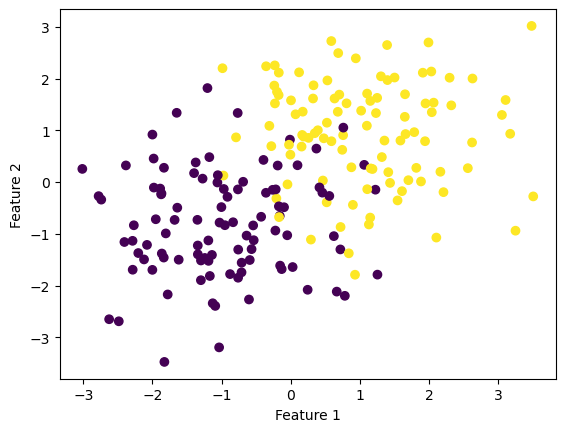

In [1]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np
np.seterr(all='ignore') 

# make the data
p_features = 3
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

# Regular Gradient Descent 

We will use gradient descent to compute a value of the parameter vector $\tilde{w}$. Here, convergence for gradient descent is declared when the improvement in the function is small enough in magnitude. Fit() utilizes the following function to obtain the gradient of the empirical risk for logistic regression:

$$\nabla L(w) = \frac{1}{n}\sum_{i = 1}^n \nabla \ell(f_{w}(x_i), y_i)\;$$

Then, we can do logistic regression by choosing a learning rate and iterating the update $\mathbf{w}^{(t+1)} \gets \mathbf{w}^{(t)} - \alpha \nabla L(\mathbf{w}^{(t)})$ until convergence.

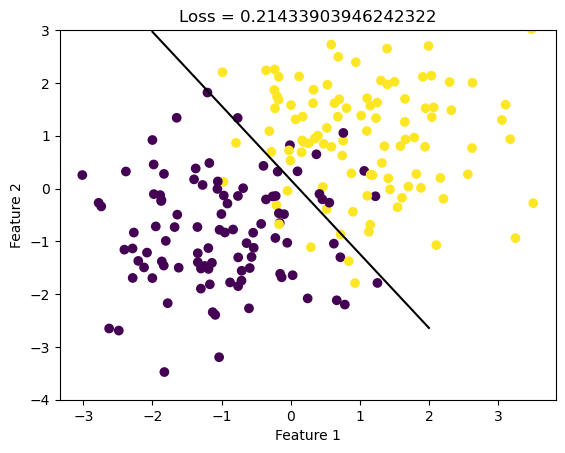

In [2]:
from LogisticRegression import LogisticRegression

LR = LogisticRegression()
LR.fit(X, y, 0.1, 1000)

def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(LR.w, -2, 2)
plt.ylim(-4,3)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

loss = LR.loss(X, y)
title = plt.title(f"Loss = {loss}")

## Accuracy of Regular Gradient Descent

Evolution of the score over the training period (last few scores):
[0.905, 0.905, 0.905, 0.905, 0.905, 0.905, 0.905, 0.905, 0.905, 0.905]


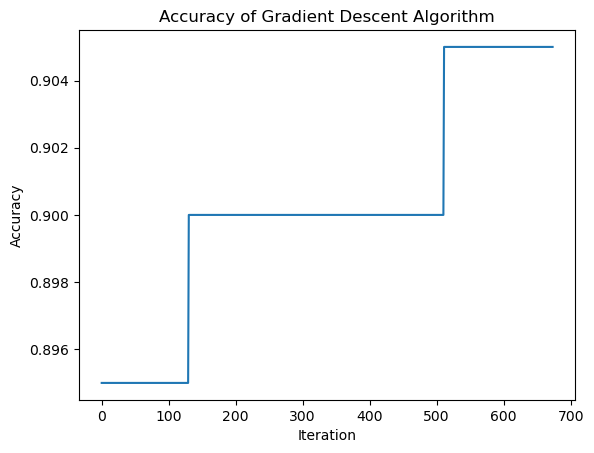

In [3]:
print("Evolution of the score over the training period (last few scores):") 
print(LR.score_history[-10:]) #just the last few scores

fig = plt.plot(LR.score_history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")
title = plt.title("Accuracy of Gradient Descent Algorithm")

## Empirical Risk of Regular Gradient Descent

Evolution of the loss over the training period (last few losses):
[0.21435661719329205, 0.21435437290179798, 0.21435214223738122, 0.21434992511071996, 0.21434772143313857, 0.21434553111660243, 0.21434335407371247, 0.2143411902177004, 0.21433903946242322, 0.21433903946242322]


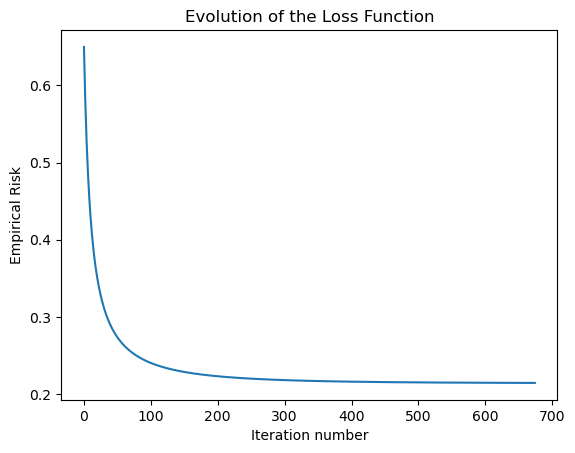

In [4]:
print("Evolution of the loss over the training period (last few losses):") 
print(LR.loss_history[-10:]) #just the last few losses

fig = plt.plot(LR.loss_history)
xlab = plt.xlabel("Iteration number")
ylab = plt.ylabel("Empirical Risk")
title = plt.title("Evolution of the Loss Function")

# Stochastic Gradient Descent

In stochastic gradient descent, we pick a random subset $S \subseteq [n] = \{1, \ldots, n\}$ and compute: 

$$\nabla_S L(w) = \frac{1}{{|S|}}\sum_{i \in S} \nabla \ell(f_{w}(x_i), y_i)\;$$

Again, convergence is declared when the improvement in the function is small enough in magnitude.

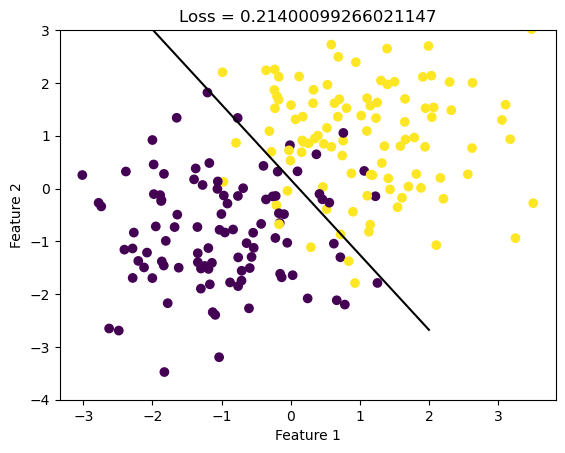

In [5]:
LR = LogisticRegression()
LR.fit_stochastic(X, y, 0.1, 100, 10)

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(LR.w, -2, 2)
plt.ylim(-4,3)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

loss = LR.loss(X, y)
title = plt.title(f"Loss = {loss}")

## Accuracy of Stochastic Gradient Descent

Evolution of the score over the training period:
[0.905, 0.905, 0.905, 0.905, 0.905, 0.905, 0.905, 0.905, 0.905, 0.905]


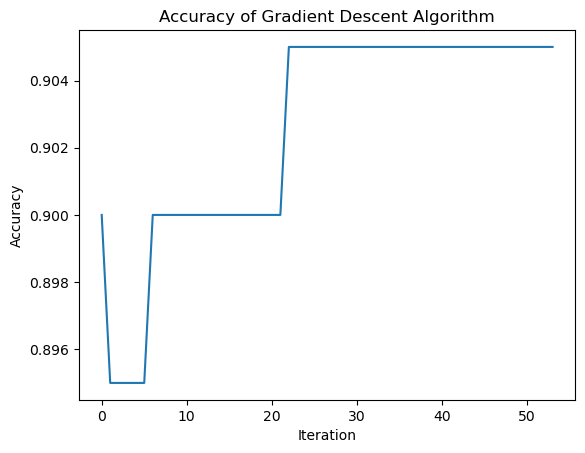

In [6]:
print("Evolution of the score over the training period:") 
print(LR.score_history[-10:]) #just the last few scores

fig = plt.plot(LR.score_history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")
title = plt.title("Accuracy of Gradient Descent Algorithm")

## Empirical Risk of Stochastic Gradient Descent

Evolution of the loss over the training period:
[0.21403943517519097, 0.2140335952527328, 0.21402473735950522, 0.21401898947249834, 0.21401196898497912, 0.2140063406393516, 0.21400308061695605, 0.2139993067707164, 0.21400099266021147, 0.21400099266021147]


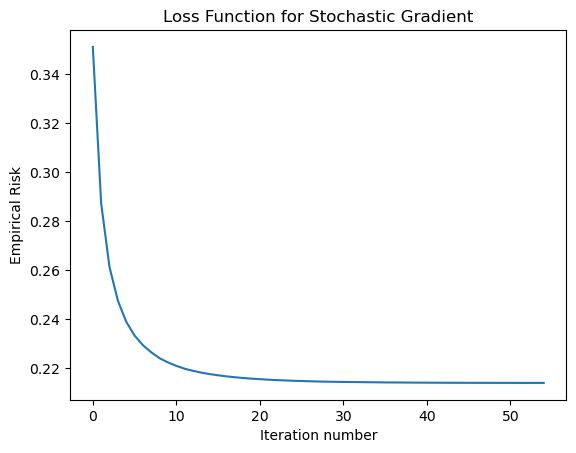

In [7]:
print("Evolution of the loss over the training period:") 
print(LR.loss_history[-10:]) #just the last few scores

fig = plt.plot(LR.loss_history)
xlab = plt.xlabel("Iteration number")
ylab = plt.ylabel("Empirical Risk")
title = plt.title("Loss Function for Stochastic Gradient")

# Nonconvergence in Gradient Descent

Below is an illustration in which gradient descent does not converge to a minimizer because the learning rate $\alpha$ is too large.

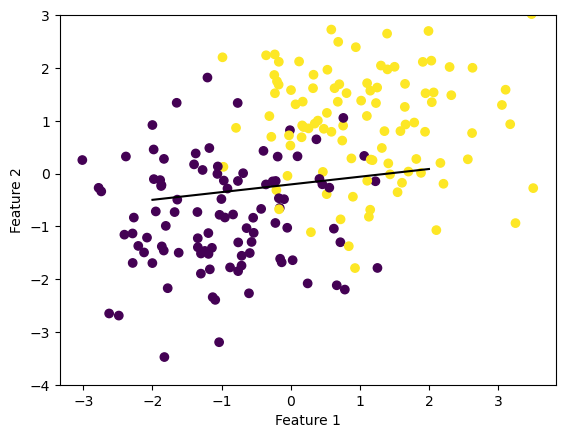

In [8]:
LR = LogisticRegression()
LR.fit(X, y, 500, 1000)

def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(LR.w, -2, 2)
plt.ylim(-4,3)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

## Choice of Batch Size in Stochastic Gradient Descent

Below is an illustration in which the choice of batch size influences how quickly the algorithm converges.

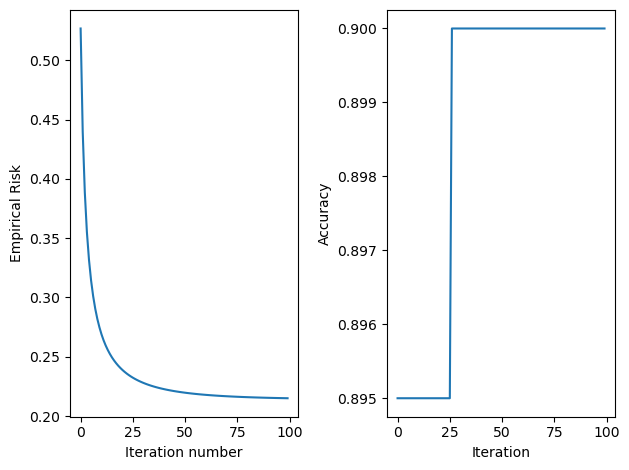

In [9]:
p_features = 11
X, y = make_blobs(n_samples = 500, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

LR = LogisticRegression()
LR.fit_stochastic(X, y, 0.1, 100, 50)

fig, axarr = plt.subplots(1, 2)

fig = axarr[0].plot(LR.loss_history)
axarr[0].set(xlabel = "Iteration number", ylabel = "Empirical Risk")

fig = axarr[1].plot(LR.score_history)
axarr[1].set(xlabel = "Iteration", ylabel = "Accuracy")

plt.tight_layout()
plt.savefig("image.jpg")